In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.decomposition import PCA


In [19]:
# Load the dataset
df = pd.read_csv("phising.csv")

# Display dataset shape and sample data
print(df.shape)
print(df['Abnormal_URL'].value_counts())
display(df.head())

(11055, 32)
Abnormal_URL
 1    9426
-1    1629
Name: count, dtype: int64


,index,having_IPhaving_IP_Address,URLURL_Length,Shortining_Service,having_At_Symbol,double_slash_redirecting,Prefix_Suffix,having_Sub_Domain,SSLfinal_State,Domain_registeration_length,...,popUpWidnow,Iframe,age_of_domain,DNSRecord,web_traffic,Page_Rank,Google_Index,Links_pointing_to_page,Statistical_report,Result
0,1,-1,1,1,1,-1,-1,-1,-1,-1,...,1,1,-1,-1,-1,-1,1,1,-1,-1
1,2,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
2,3,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
3,4,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
4,5,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1


In [20]:
# Drop the 'index' column if exists
if 'index' in df.columns:
    df.drop('index', axis=1, inplace=True)

# Memeriksa apakah ada nilai yang hilang (NA) dalam DataFrame
missing_values = df.isna().sum()

# Menampilkan fitur-fitur yang memiliki nilai yang hilang
features_with_missing_values = missing_values[missing_values > 0]
if not features_with_missing_values.empty:
    print("Fitur-fitur dengan nilai yang hilang:")
    print(features_with_missing_values)
else:
    print("Tidak ada fitur dengan nilai yang hilang dalam data.")


Tidak ada fitur dengan nilai yang hilang dalam data.


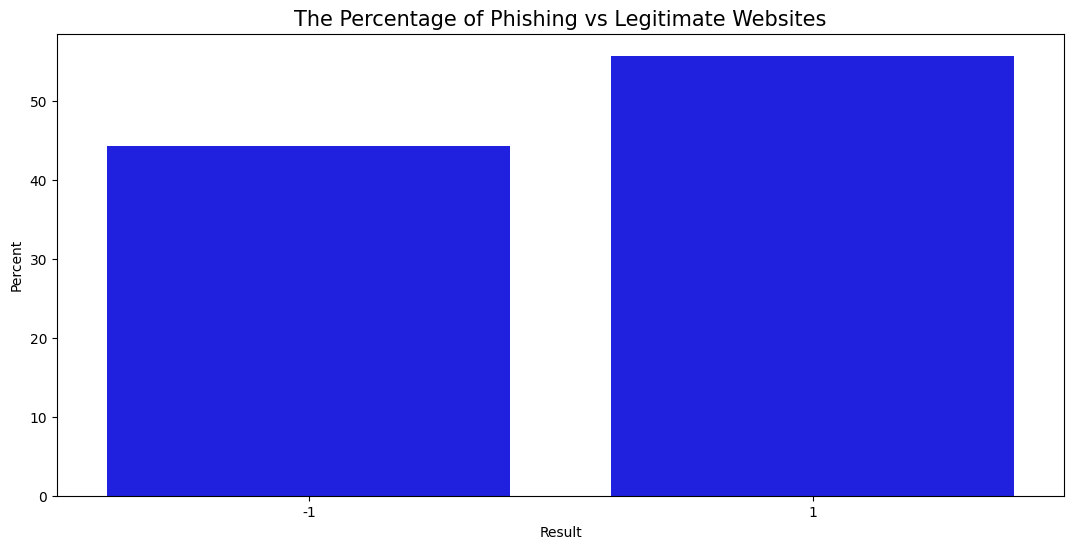

In [21]:
# Plot the percentage of phishing vs legitimate websites
plt.figure(figsize=(13, 6))
ax = sns.barplot(x="Result", y="Result", data=df, estimator=lambda x: len(x) / len(df) * 100, color='Blue')
ax.set(ylabel="Percent")
ax.set_title('The Percentage of Phishing vs Legitimate Websites', size=15)
plt.show()


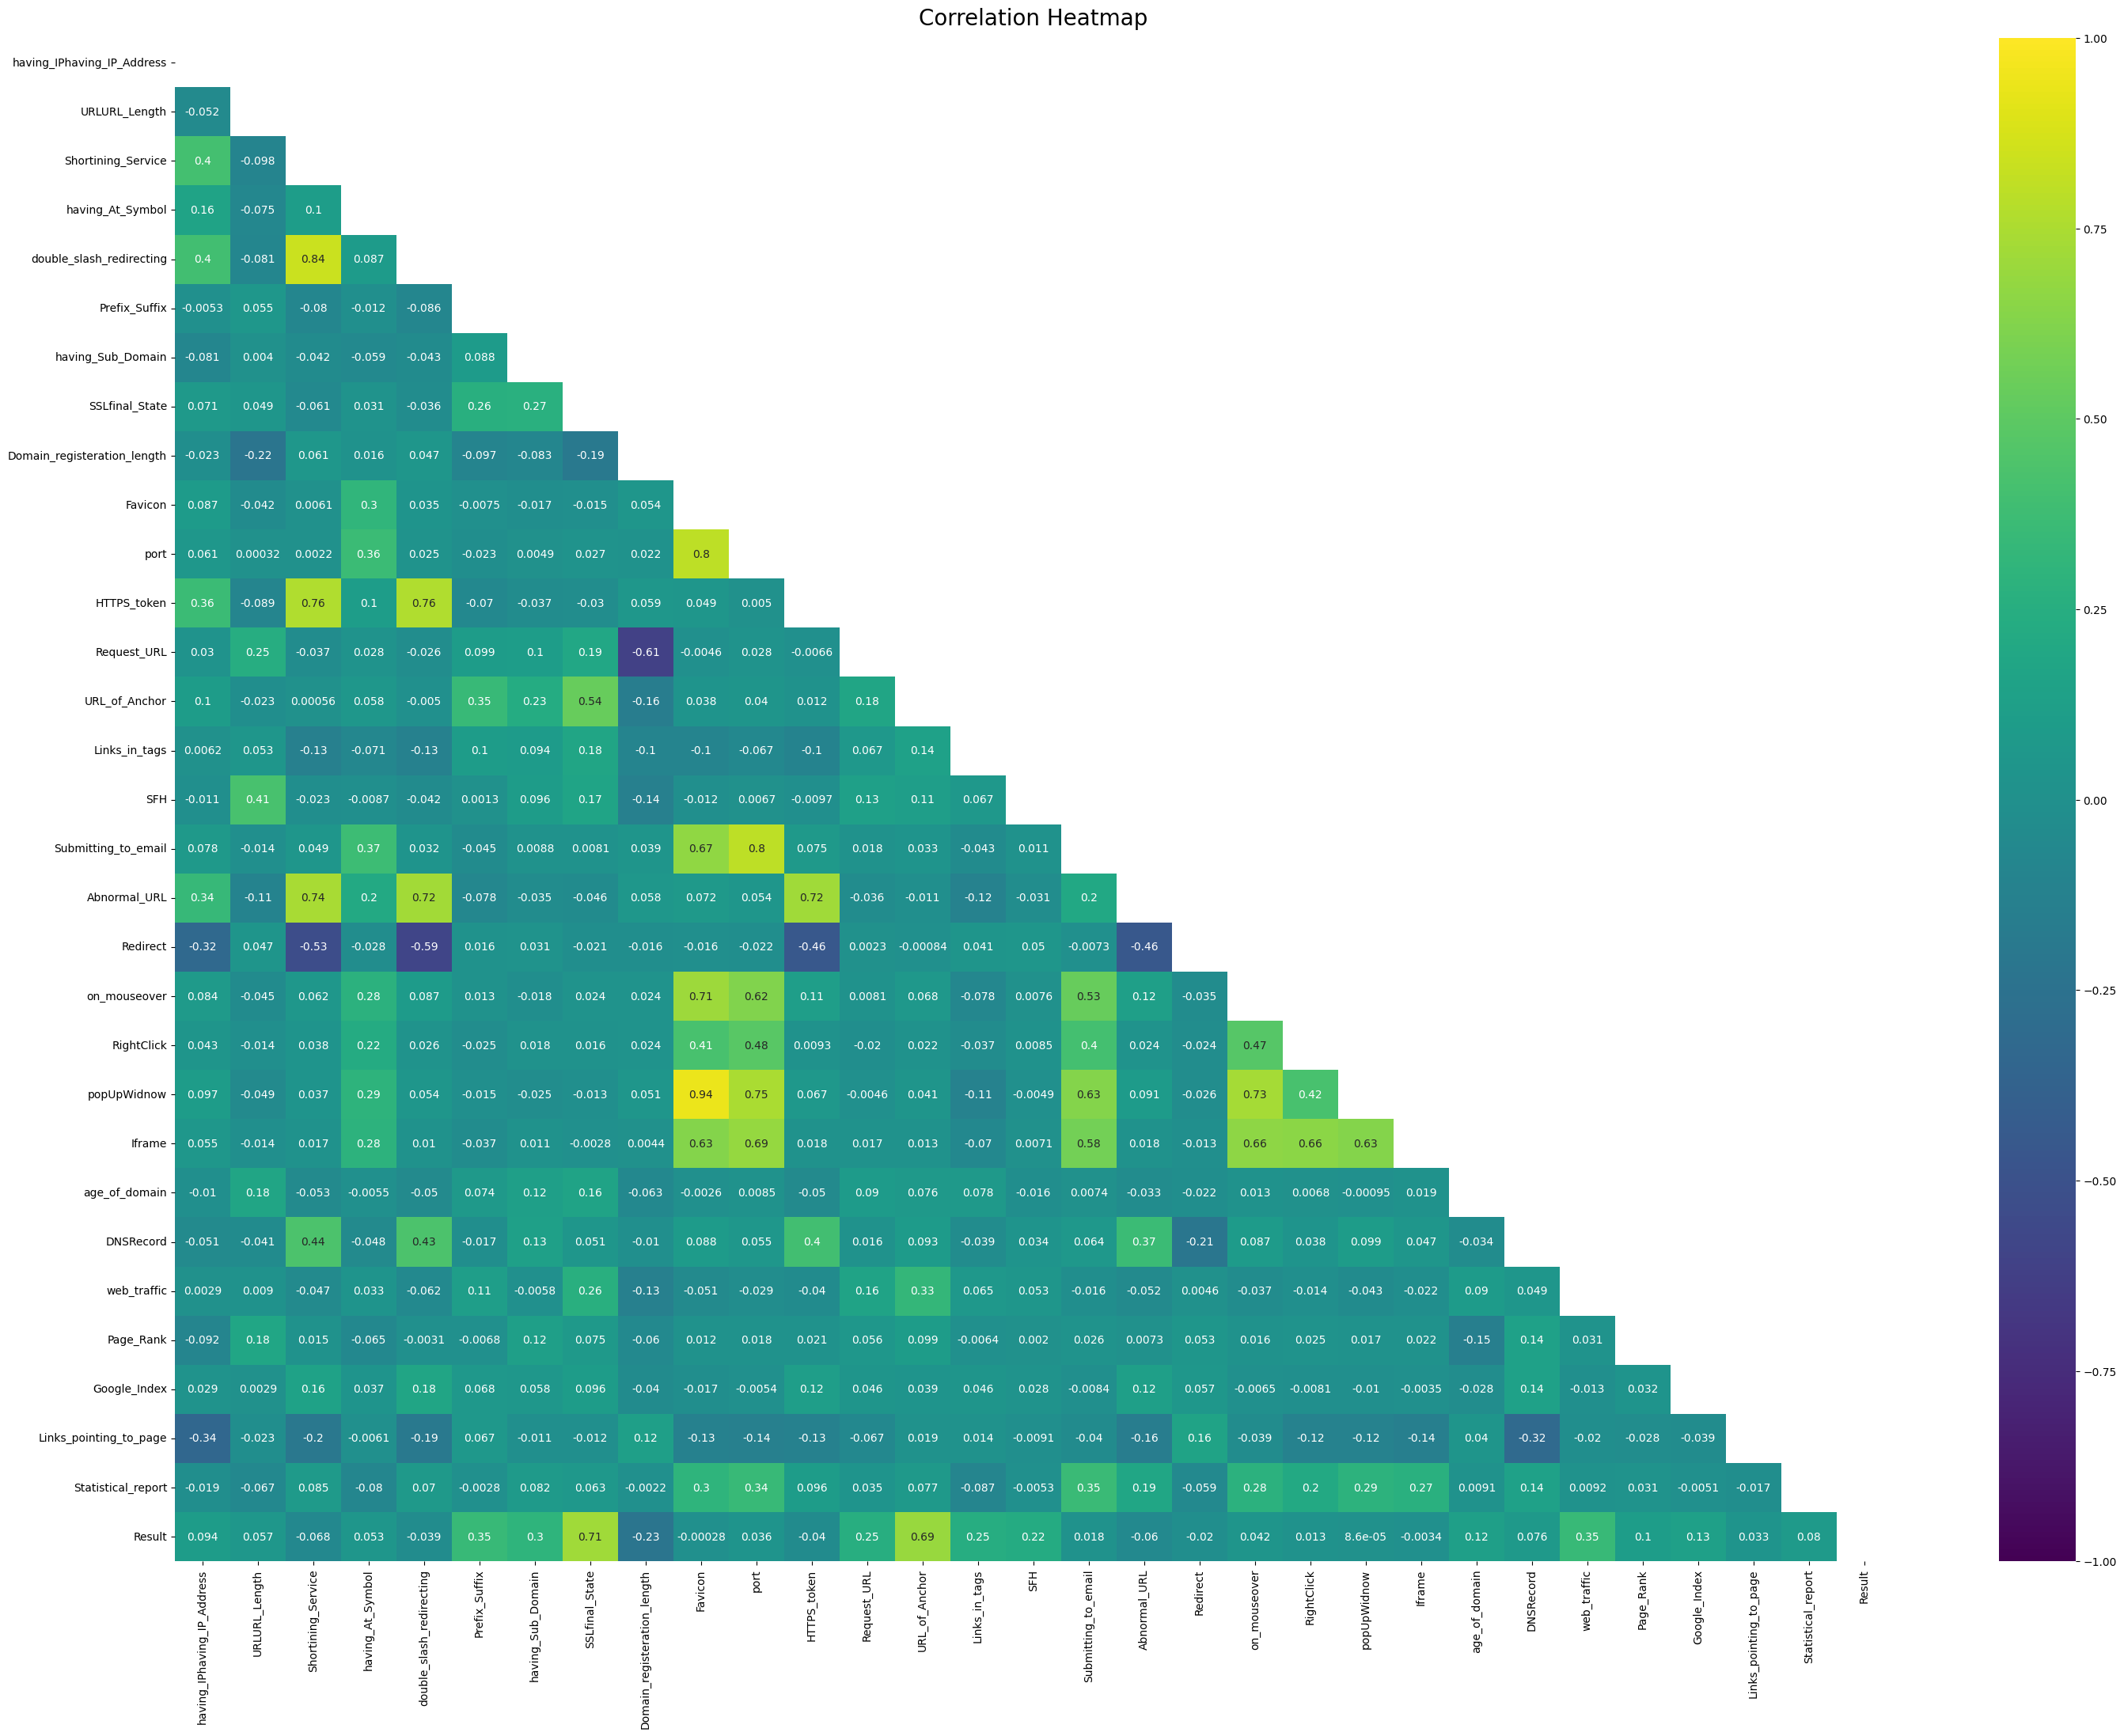

In [22]:
# Plot the correlation heatmap
plt.figure(figsize=(35, 25))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(corr, mask=mask, vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':20}, pad=12)
plt.show()

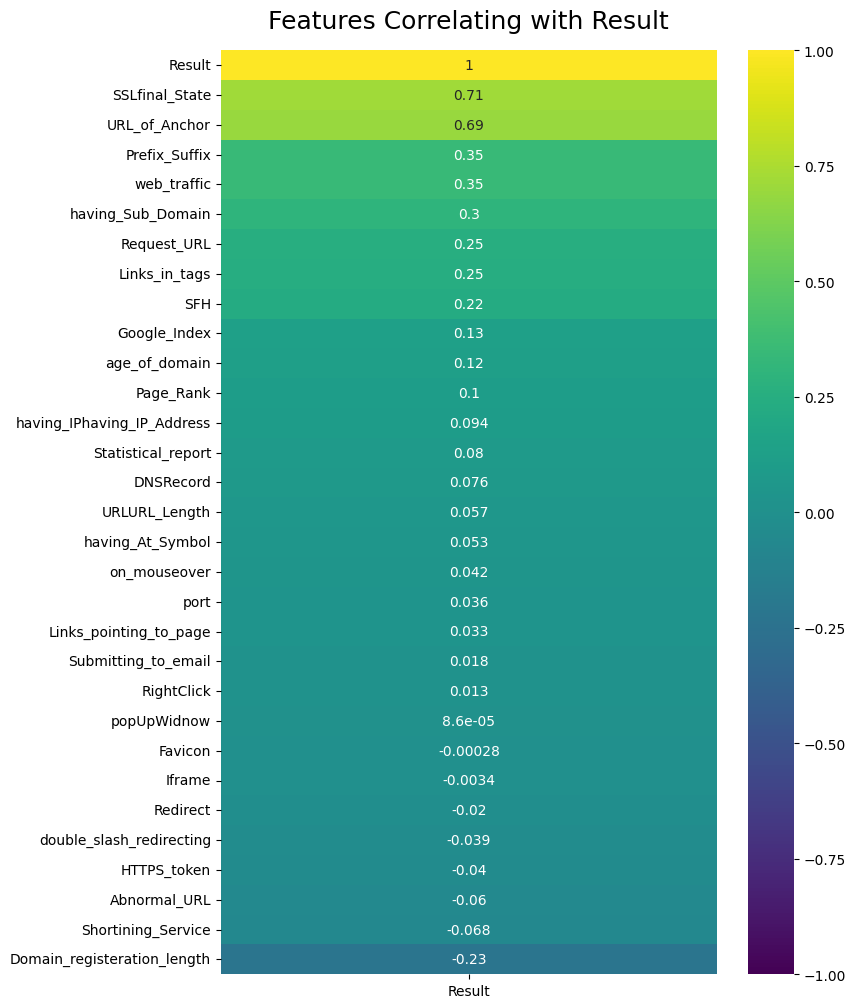

In [23]:
# Plot the features correlating with the result
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Result']].sort_values(by='Result', ascending=False), vmin=-1, vmax=1, annot=True, cmap='viridis')
heatmap.set_title('Features Correlating with Result', fontdict={'fontsize':18}, pad=16)
plt.show()

In [24]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train4 = scaler.fit_transform(X_train4)
X_test4 = scaler.transform(X_test4)

#Split 80:20

In [26]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
# Standardize the features
scaler = StandardScaler()
X_train2 = scaler.fit_transform(X_train2)
X_test2 = scaler.transform(X_test2)

#Split 90:10

In [28]:

# Splitting the data
X = df.drop('Result', axis=1)
y = df['Result']
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y, test_size=0.1, random_state=42)

In [29]:
# Standardize the features
scaler = StandardScaler()
X_train3 = scaler.fit_transform(X_train3)
X_test3 = scaler.transform(X_test3)

In [30]:
# Set the parameters for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf', 'linear']}

In [31]:
from sklearn.model_selection import cross_val_score
# Initialize the SVM model
svm_model = SVC(random_state=42)

print("77:33==========================================================")
# Calculate cross-validated mean accuracy
cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5, scoring='accuracy')
cross_mean_value = np.mean(cv_scores)
cross_error_value = 1 - cross_mean_value

print(f"Cross-Validated Mean Accuracy: {cross_mean_value:.4f}")
print(f"Cross-Validated Error Rate: {cross_error_value:.4f}")

print("80:20==========================================================")
# Calculate cross-validated mean accuracy
cv_scores = cross_val_score(svm_model, X_train2, y_train2, cv=5, scoring='accuracy')
cross_mean_value = np.mean(cv_scores)
cross_error_value = 1 - cross_mean_value

print(f"Cross-Validated Mean Accuracy: {cross_mean_value:.4f}")
print(f"Cross-Validated Error Rate: {cross_error_value:.4f}")

print("90:10==========================================================")
# Calculate cross-validated mean accuracy
cv_scores = cross_val_score(svm_model, X_train3, y_train3, cv=5, scoring='accuracy')
cross_mean_value = np.mean(cv_scores)
cross_error_value = 1 - cross_mean_value

print(f"Cross-Validated Mean Accuracy: {cross_mean_value:.4f}")
print(f"Cross-Validated Error Rate: {cross_error_value:.4f}")

77:33==========================================================
Cross-Validated Mean Accuracy: 0.9488
Cross-Validated Error Rate: 0.0512
80:20==========================================================
Cross-Validated Mean Accuracy: 0.9501
Cross-Validated Error Rate: 0.0499
90:10==========================================================
Cross-Validated Mean Accuracy: 0.9503
Cross-Validated Error Rate: 0.0497


In [32]:
# Perform GridSearchCV
X_train = X_train3 
X_test = X_test3
y_train = y_train3
y_test = y_test3

grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, scoring='accuracy', cv=3, n_jobs=2)
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [33]:
# Initialize the SVM model with the best parameters
best_svm_model = SVC(**best_params, random_state=42)

# Train the model
best_svm_model.fit(X_train, y_train)

# Make predictions
y_pred = best_svm_model.predict(X_test)

# Calculate cross-validated mean accuracy
cv_scores = cross_val_score(best_svm_model, X_train, y_train, cv=5, scoring='accuracy')
cross_mean_value = np.mean(cv_scores)
cross_error_value = 1 - cross_mean_value

print(f"Cross-Validated Mean Accuracy: {cross_mean_value:.4f}")
print(f"Cross-Validated Error Rate: {cross_error_value:.4f}")

# Evaluate the model
print("SVM Model Training Score: ", best_svm_model.score(X_train, y_train))
print("SVM Model Testing Score: ", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred, target_names=['Legitimate', 'Phishing']))

Cross-Validated Mean Accuracy: 0.9679
Cross-Validated Error Rate: 0.0321
SVM Model Training Score:  0.9873354105940295
SVM Model Testing Score:  0.9710669077757685

              precision    recall  f1-score   support

  Legitimate       0.98      0.95      0.97       481
    Phishing       0.97      0.98      0.97       625

    accuracy                           0.97      1106
   macro avg       0.97      0.97      0.97      1106
weighted avg       0.97      0.97      0.97      1106



In [34]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

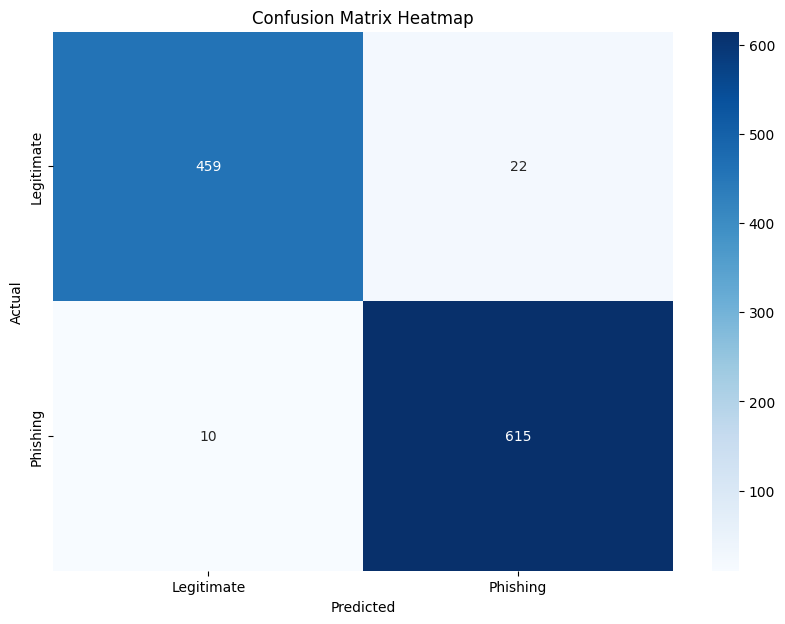

In [44]:
# Plotting the confusion matrix as heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [36]:
# Reduce dimensionality with PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

<Figure size 1200x600 with 0 Axes>

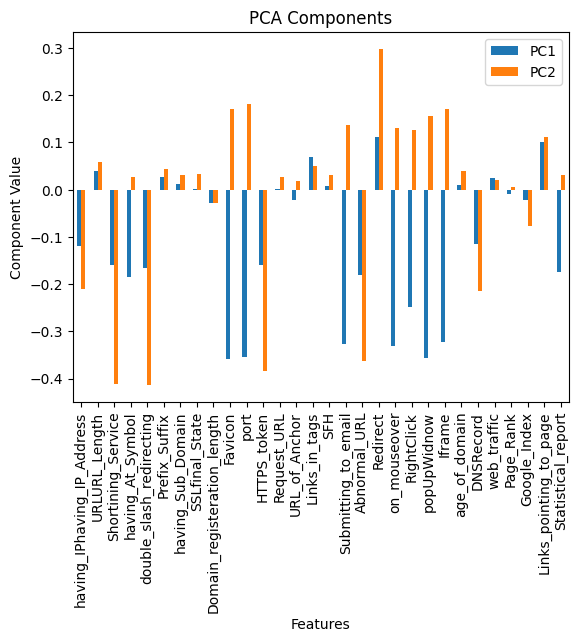

In [37]:
# Print PCA components to understand the identity of PC1 and PC2
components_df = pd.DataFrame(pca.components_, columns=df.columns[:-1], index=['PC1', 'PC2'])

# Plot PCA components
plt.figure(figsize=(12, 6))
components_df.T.plot(kind='bar')
plt.title('PCA Components')
plt.xlabel('Features')
plt.ylabel('Component Value')
plt.show()

In [38]:
# Train SVM on the reduced data
best_svm_model_pca = SVC(**best_params, random_state=42)
best_svm_model_pca.fit(X_train_pca, y_train)

SVC(C=10, gamma=0.1, random_state=42)

Text(0, 0.5, 'Principal Component 2')

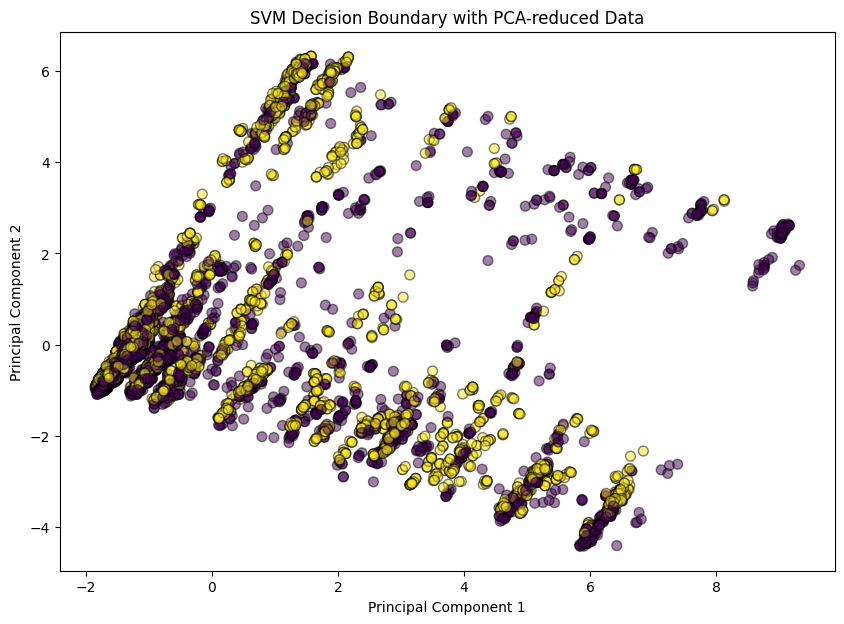

In [39]:
# Plot decision boundary
plt.figure(figsize=(10, 7))

# Plot training points
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', s=50, alpha=0.5, edgecolors='k', label='Train')
plt.title('SVM Decision Boundary with PCA-reduced Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')


In [40]:
# Create mesh to plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = best_svm_model_pca.predict(np.c_[xx.ravel(), yy.ravel()])

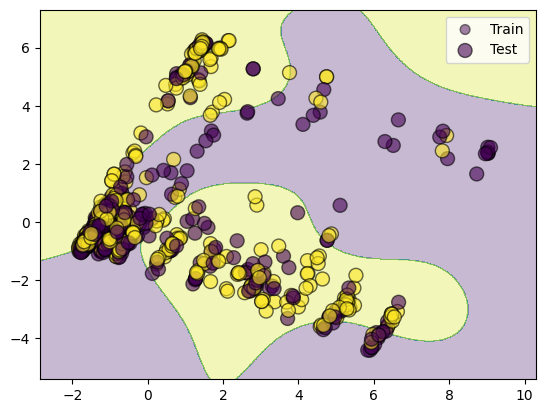

In [41]:
# Plot also the test points
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap='viridis', alpha=0.3)
scatter2 = plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='viridis', s=100, edgecolors='k', alpha=0.6, label='Test')
# Add legend
plt.legend(handles=[scatter, scatter2], labels=['Train', 'Test'])

plt.show()

In [42]:
# Menerima input dari pengguna
input_features = []
for feature in X.columns:
    value = float(input("Masukkan nilai 1 jika Yes (Legitimate), 0 jika Suspicious, -1 jika Phising  untuk {}: ".format(feature)))
    input_features.append(value)

# Pra-pemrosesan input
input_features = np.array(input_features).reshape(1, -1)  # Ubah menjadi array 2 dimensi untuk kompatibilitas dengan pemrosesan model

# Lakukan penskalaan seperti pada data pelatihan
input_features_scaled = scaler.transform(input_features)

# Prediksi apakah itu phishing atau bukan
prediction = best_svm_model.predict(input_features_scaled)

# Tampilkan hasil prediksi
if prediction == 1:
    print("Data tersebut diprediksi sebagai phishing.")
else:
    print("Data tersebut diprediksi sebagai bukan phishing.")


Data tersebut diprediksi sebagai phishing.


c:\Users\Hansen Dafa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
